In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import os.path
import cv2
print(tf.__version__)

2.0.0


In [2]:
#Test and train image set
train='D:\PokemonImages\PokemonData\Train'
test='D:\PokemonImages\PokemonData\Test'


In [3]:
#Printing the name of the pokemon images files that are in the training set
pokemon_name = os.listdir('D:\PokemonImages\PokemonData\Train')
print (pokemon_name)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

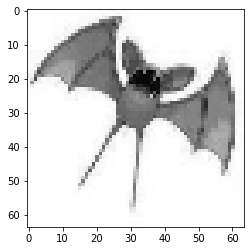

In [4]:
#processing the images files
imagep=[] # list for the images that are processed
labels=[]# labels so that images from different directories can be distinsguished
height = 64
width = 64
dim = (width, height) # setting the desired height and weight for the images
image_path = "D:\PokemonImages\PokemonData\Train" # path of the images 

#labeling and processing each image file for all the pokemon in our training directory into a numpy array
for pokemon in pokemon_name:
    image_files = os.path.join(image_path,pokemon) #getting images from each pokemon's directory
    pokeid_num = pokemon_name.index(pokemon)
    label = np.zeros(len(pokemon_name))
    label[pokeid_num] = 1
    labels.append(label)
    for img in (os.listdir(image_files)):
        try:
            img_read=cv2.cv2.imread(os.path.join(image_files,img),cv2.IMREAD_GRAYSCALE) #converting images to an array
            resize_img= cv2.resize(img_read, dim) # resizing the images according to the dimensions
            col_img=cv2.cvtColor(resize_img, cv2.IMREAD_GRAYSCALE)
            plt.imshow(col_img, cmap='gray') 
            imagep.append(([col_img,pokeid_num]))
        except Exception :
               pass

In [5]:
print (len(imagep))

6675


In [6]:
#Randomise the images to reduce chances of overfitting
import random

random.shuffle(imagep)


In [7]:
#making each indiviual image and label into an array and storing it into the list
X =[]
y =[]

for f,l in imagep:
    X.append(f)
    y.append(l)

X = np.array(X)#.reshape(-1,64,64, 1)
y=np.array(y)
y1=tf.keras.utils.to_categorical(y) # convert y values to a binary matrix for categorical_crossentropy

#checking that the x and y are the same shape
print ((X.shape))
print ((y.shape))
print (len(X))
print (len(y1))

(6675, 64, 64, 4)
(6675,)
6675
6675


In [8]:
#Creating the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3,3),activation='relu', input_shape = (64, 64,4)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(150, activation = 'softmax'))

In [9]:
model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
# train the data for 200 epochs
model.fit(X,y1 ,batch_size = 64, epochs = 100, verbose=1, validation_split = 0.3)
# save the model
model.save('pdmodelF')

Train on 4672 samples, validate on 2003 samples
Epoch 1/100
4672/4672 [==============================] - 38s 8ms/sample - loss: 180.4565 - accuracy: 0.0094 - val_loss: 5.6889 - val_accuracy: 0.0125
Epoch 2/100
4672/4672 [==============================] - 36s 8ms/sample - loss: 4.8966 - accuracy: 0.0771 - val_loss: 5.1017 - val_accuracy: 0.0344
Epoch 3/100
4672/4672 [==============================] - 37s 8ms/sample - loss: 3.5770 - accuracy: 0.2755 - val_loss: 5.4611 - val_accuracy: 0.0534
Epoch 4/100
4672/4672 [==============================] - 39s 8ms/sample - loss: 1.9764 - accuracy: 0.5957 - val_loss: 6.6230 - val_accuracy: 0.0649
Epoch 5/100
4672/4672 [==============================] - 41s 9ms/sample - loss: 0.9728 - accuracy: 0.7999 - val_loss: 7.1848 - val_accuracy: 0.0639
Epoch 6/100
4672/4672 [==============================] - 41s 9ms/sample - loss: 0.5306 - accuracy: 0.8983 - val_loss: 8.0925 - val_accuracy: 0.0569
Epoch 7/100
4672/4672 [==============================] - 42s 9

4672/4672 [==============================] - 32s 7ms/sample - loss: 0.1804 - accuracy: 0.9743 - val_loss: 22.0013 - val_accuracy: 0.0559
Epoch 56/100
4672/4672 [==============================] - 32s 7ms/sample - loss: 0.1766 - accuracy: 0.9700 - val_loss: 22.2554 - val_accuracy: 0.0549
Epoch 57/100
4672/4672 [==============================] - 32s 7ms/sample - loss: 0.1028 - accuracy: 0.9816 - val_loss: 23.0773 - val_accuracy: 0.0569
Epoch 58/100
4672/4672 [==============================] - 32s 7ms/sample - loss: 0.0912 - accuracy: 0.9852 - val_loss: 22.4807 - val_accuracy: 0.0529
Epoch 59/100
4672/4672 [==============================] - 35s 7ms/sample - loss: 0.0886 - accuracy: 0.9850 - val_loss: 23.7386 - val_accuracy: 0.0584
Epoch 60/100
4672/4672 [==============================] - 37s 8ms/sample - loss: 0.0686 - accuracy: 0.9872 - val_loss: 25.9723 - val_accuracy: 0.0549
Epoch 61/100
4672/4672 [==============================] - 37s 8ms/sample - loss: 0.0576 - accuracy: 0.9899 - val_

In [10]:
#Evaluating the accuracy of the test model
evals = model.evaluate(X,y1 ,batch_size = 64)
print('test loss, test acc:', evals)

6675/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test loss, test acc: [9.982370037329261, 0.70516855]


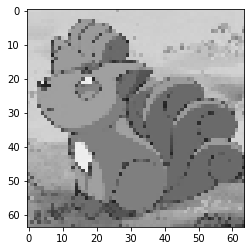

In [11]:
#Loading our test images 
height = 64
width = 64
dim = (width, height)
path = "D:\PokemonImages\PokemonData\Test"
pimagest=[]
for timg in (os.listdir(path)):
    try:
        testimg_read=cv2.imread(os.path.join(path,timg), cv2.IMREAD_GRAYSCALE)
        resize_timg = cv2.resize(testimg_read,dim)
        col_timg=cv2.cvtColor(resize_timg, cv2.IMREAD_GRAYSCALE)
        plt.imshow(col_timg, cmap='gray')
        pimagest.append((col_timg))
    except Exception :
        pass
    

In [12]:
# converting the images so they are the same type and shape as the training set
pimaged=np.array(pimagest).reshape(-1,64,64, 4)
pimageds=tf.dtypes.cast(pimaged, tf.float32) 

In [13]:
print (pimageds.shape)

(37, 64, 64, 4)


In [14]:
#Loading the model and storing the output
model=tf.keras.models.load_model('pdmodelF')

In [15]:
preds=model.predict(pimageds)

In [16]:
result=((np.argmax(preds, axis=1)))
print (result)

[138  83  85  87  76 139 107 143 105  68  26 129  85  81  67 135  83  71
  36  85  78  26 135 107  81  78  13   8  75 110 130  75  96   4  96 107
  95]


In [17]:
predpoke=[]
for r in result:
    predpoke.append(pokemon_name[r])

print (predpoke)
   

['Venusaur', 'Mewtwo', 'MrMime', 'Nidoking', 'Magnemite', 'Victreebel', 'Ponyta', 'Wartortle', 'Poliwhirl', 'Krabby', 'Dragonair', 'Starmie', 'MrMime', 'Metapod', 'Koffing', 'Vaporeon', 'Mewtwo', 'Machamp', 'Exeggutor', 'MrMime', 'Mankey', 'Dragonair', 'Vaporeon', 'Ponyta', 'Metapod', 'Mankey', 'Chansey', 'Bellsprout', 'Magmar', 'Psyduck', 'Staryu', 'Magmar', 'Paras', 'Arbok', 'Paras', 'Ponyta', 'Onix']


In [18]:
#Webscaper function to retrieve pokemon information
def pokedexinfo(value):
    import requests
    from bs4 import BeautifulSoup
    URL = 'https://www.pokemon.com/uk/pokedex/'+value
    page = requests.get(URL)
    soups = BeautifulSoup(page.content, 'html.parser')
    pinfo=soups.find('p',class_='version-y active').text
    pab=soups.find('div',class_='pokemon-ability-info color-bg color-lightblue match active').text
    wgt=[] #list for weight 
    hgt=[] #list for height
    pabi=pab.lstrip() #Encoded it to text and removed empty space
    ptxt=pinfo.lstrip() #Pokemon description
    hgt.append(pabi[0:15]) #Height
    wgt.append(pabi[15:30])#Weight

    #Pokedex Information
    print (str(ptxt))
    #print 'Information'
    for h in hgt:
        print ('Height:',h[7:10],'m')

    for w in wgt:
        print  ('Weight:', w[7:11],'kg')

Wartortle


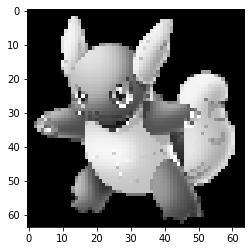

Its tail is large and covered with a rich, thick fur. The tail
becomes increasingly deeper in color as Wartortle ages.
The scratches on its shell are evidence of this Pokémon's
toughness as a battler.
                
Height: 1.0 m
Weight: 22.5 kg


In [60]:
#Testing our pokedex 
print (predpoke[7])  #10
pr=pimagest[7]
pt=cv2.resize(pr,dim)
plt.imshow(pt,cmap='gray')
plt.show()
pokedexinfo(predpoke[7])

Dragonair


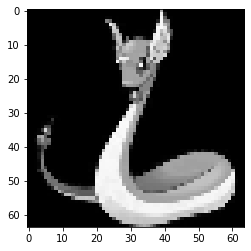

Dragonair stores an enormous amount of energy inside its
body. It is said to alter weather conditions in its vicinity by
discharging energy from the crystals on its neck and tail.
                
Height: 4.0 m
Weight: 16.5 kg


In [61]:
#Testing our pokedex 
print (predpoke[10]) 
pr=pimagest[10]
pt=cv2.resize(pr,dim)
plt.imshow(pt,cmap='gray')
plt.show()
pokedexinfo(predpoke[10])